/Users/usui/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21453 (\N{CJK UNIFIED IDEOGRAPH-53CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/usui/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23556 (\N{CJK UNIFIED IDEOGRAPH-5C04}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/usui/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/usui/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/usui/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12506 (\N{KATAKANA LETTER PE}) missing fr

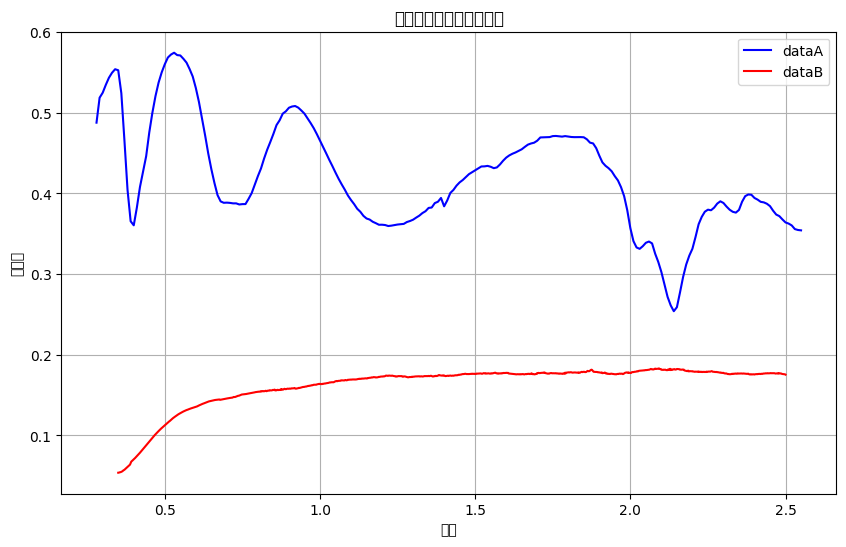

In [53]:
import csv

# CSVファイルを開く
csv_file = open('RelabDatabase2022Dec31/Library_Mineral_BD-VNIR.csv', 'r')

# CSVファイルを読み込むためのリーダーを作成
csv_reader = csv.reader(csv_file)

# 行を格納するリストを作成
targetA_row = 3  # 格納したい行の番号（0から始まるインデックス）
targetB_row = 4  # 格納したい行の番号（0から始まるインデックス）

dataA = []
dataB = []

# CSVファイルを1行ずつ読み込み、指定した行を取得
for row_index, row in enumerate(csv_reader):
    if row_index == targetA_row:
        dataA = row
        break
for row_index, row in enumerate(csv_reader):
    if row_index == targetB_row:
        dataB = row
        break
        
# CSVファイルを閉じる
csv_file.close()

# 取得した行を表示
# print(dataA)
# dataA = [float(x) for x in dataA]
band = int(float(dataA[2]))
dataA_wavelength = [float(x) for x in dataA[3:band+3]]
dataA_reflectance = [float(x) for x in dataA[band+3:band*2+3]]
band = int(float(dataB[2]))
dataB_wavelength = [float(x) for x in dataB[3:band+3]]
dataB_reflectance = [float(x) for x in dataB[band+3:band*2+3]]
# print(type(dataB_reflectance))
# print(dataA_wavelength)
# print(dataB_wavelength)

# 2つのリストを要素ごとに結合して2次元配列を作成
dataA = [[x, y] for x, y in zip(dataA_wavelength, dataA_reflectance)]
dataB = [[x, y] for x, y in zip(dataB_wavelength, dataB_reflectance)]
# print(dataA)
# print(dataB)

# # 対応する要素ごとの差分を計算
# differences = [a - b for a, b in zip(dataA_wavelength, dataB_wavelength)]
# print(differences)

import matplotlib.pyplot as plt
dataA = np.array(dataA)
dataB = np.array(dataB)
# プロット
plt.figure(figsize=(10, 6))  # グラフのサイズを設定

# dataAをプロット
plt.plot(dataA[:, 0], dataA[:, 1], label='dataA', color='blue')

# dataBをプロット
plt.plot(dataB[:, 0], dataB[:, 1], label='dataB', color='red')

# 軸ラベルと凡例を設定
plt.xlabel('波長')
plt.ylabel('反射率')
plt.legend()

# グラフを表示
plt.grid(True)  # グリッドを表示
plt.title('スペクトルデータの比較')  # グラフのタイトル
plt.show()

In [25]:
import numpy as np

# dataAとdataBの波長データと反射率データを用意
dataA = np.array(dataA)
dataB = np.array(dataB)

# 共通の波長範囲を見つける
min_wavelength = max(dataA[0, 0], dataB[0, 0])
max_wavelength = min(dataA[-1, 0], dataB[-1, 0])
print(min_wavelength)
print(max_wavelength)

# 共通の波長範囲での波長間隔を計算
wavelength_step = min(np.diff(dataA[:, 0]).min(), np.diff(dataB[:, 0]).min())
print(wavelength_step)

# 共通の波長範囲での波長データを作成
common_wavelength = np.arange(min_wavelength, max_wavelength, wavelength_step)
print(common_wavelength)

# 線形補間でdataAとdataBを共通の波長範囲に合わせる
interpolatedA = np.interp(common_wavelength, dataA[:, 0], dataA[:, 1])
interpolatedB = np.interp(common_wavelength, dataB[:, 0], dataB[:, 1])
# print(interpolatedA)

0.35
2.5
0.0019999999999997797
[0.35  0.352 0.354 ... 2.496 2.498 2.5  ]


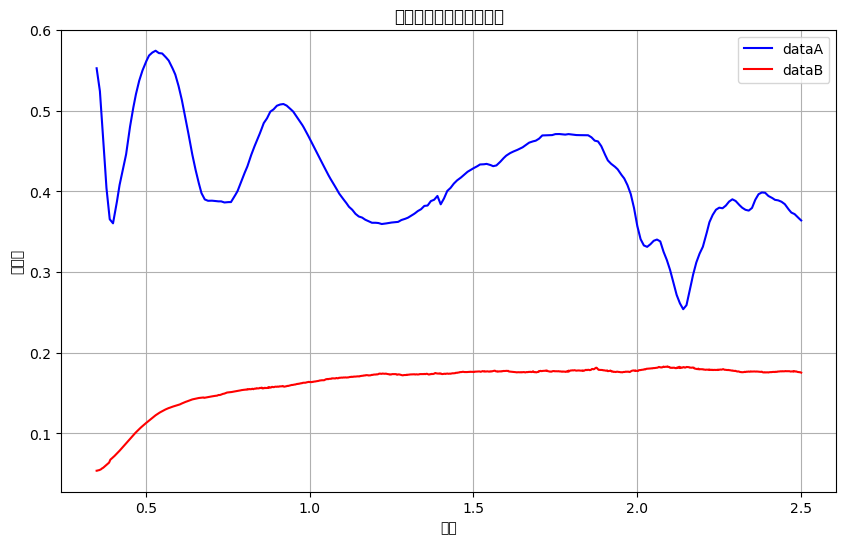

In [30]:
import matplotlib.pyplot as plt

# プロット
plt.figure(figsize=(10, 6))  # グラフのサイズを設定

# dataAをプロット
plt.plot(common_wavelength, interpolatedA, label='dataA', color='blue')

# dataBをプロット
plt.plot(common_wavelength, interpolatedB, label='dataB', color='red')

# 軸ラベルと凡例を設定
plt.xlabel('波長')
plt.ylabel('反射率')
plt.legend()

# グラフを表示
plt.grid(True)  # グリッドを表示
plt.title('スペクトルデータの比較')  # グラフのタイトル
plt.show()

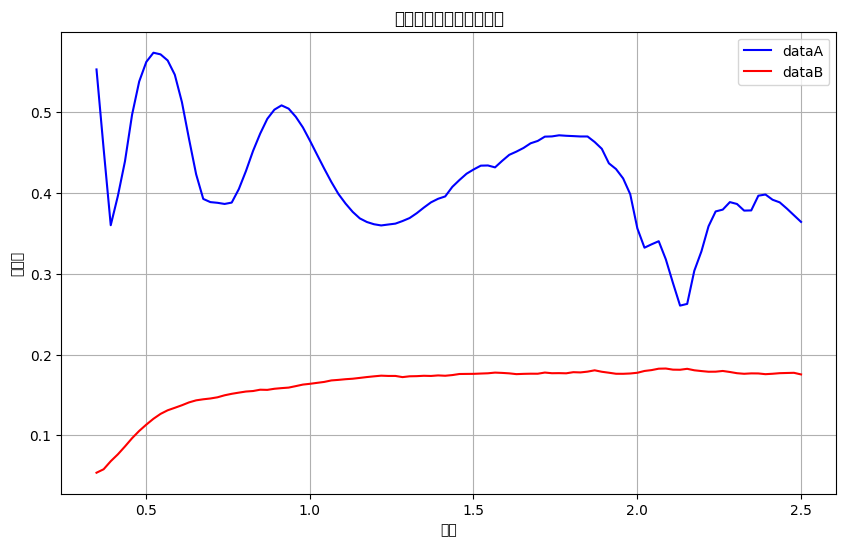

In [58]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# dataAとdataBの波長データと反射率データを用意
dataA = np.array(dataA)
dataB = np.array(dataB)

# dataAとdataBの波長範囲を求める
min_wavelength = max(min(dataA[:, 0]), min(dataB[:, 0]))
max_wavelength = min(max(dataA[:, 0]), max(dataB[:, 0]))

# 求めた波長範囲で新しい波長データを生成
new_wavelength = np.linspace(min_wavelength, max_wavelength, num=100)  # 適切な数を選択

# 多項式補間を行う
interpolated_dataA = interp1d(dataA[:, 0], dataA[:, 1], kind='quadratic')
interpolated_dataB = interp1d(dataB[:, 0], dataB[:, 1], kind='quadratic')

# 補間後のデータを評価
interpolated_dataA_values = interpolated_dataA(new_wavelength)
interpolated_dataB_values = interpolated_dataB(new_wavelength)

# プロット
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.plot(new_wavelength, interpolated_dataA_values, label='dataA', color='blue')
plt.plot(new_wavelength, interpolated_dataB_values, label='dataB', color='red')

# 軸ラベルと凡例を設定
plt.xlabel('波長')
plt.ylabel('反射率')
plt.legend()

# グラフを表示
plt.grid(True)  # グリッドを表示
plt.title('スペクトルデータの比較')  # グラフのタイトル
plt.show()

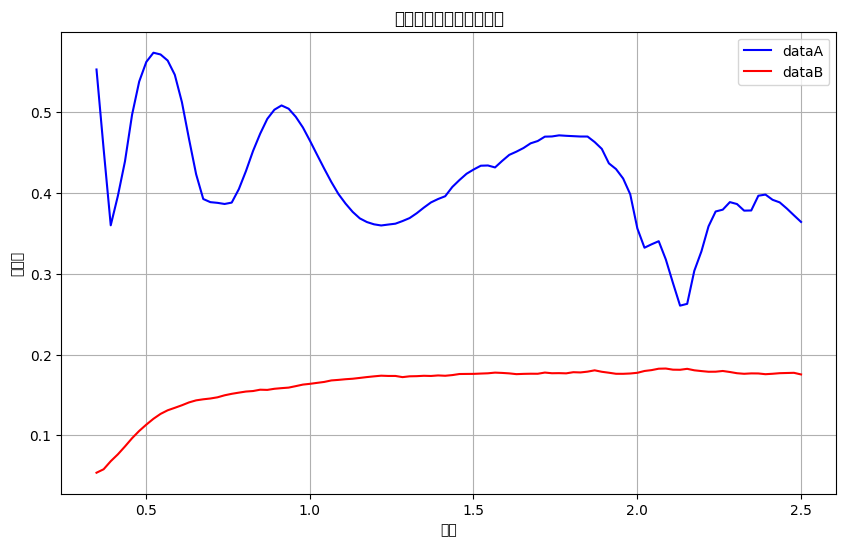

In [57]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# dataAとdataBの波長データと反射率データを用意
dataA = np.array(dataA)
dataB = np.array(dataB)

# dataAとdataBの波長範囲を求める
min_wavelength = max(min(dataA[:, 0]), min(dataB[:, 0]))
max_wavelength = min(max(dataA[:, 0]), max(dataB[:, 0]))

# 求めた波長範囲で新しい波長データを生成
new_wavelength = np.linspace(min_wavelength, max_wavelength, num=100)  # 適切な数を選択

# 多項式補間を行う
interpolated_dataA = interp1d(dataA[:, 0], dataA[:, 1], kind='cubic')
interpolated_dataB = interp1d(dataB[:, 0], dataB[:, 1], kind='cubic')

# 補間後のデータを評価
interpolated_dataA_values = interpolated_dataA(new_wavelength)
interpolated_dataB_values = interpolated_dataB(new_wavelength)

# プロット
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.plot(new_wavelength, interpolated_dataA_values, label='dataA', color='blue')
plt.plot(new_wavelength, interpolated_dataB_values, label='dataB', color='red')

# 軸ラベルと凡例を設定
plt.xlabel('波長')
plt.ylabel('反射率')
plt.legend()

# グラフを表示
plt.grid(True)  # グリッドを表示
plt.title('スペクトルデータの比較')  # グラフのタイトル
plt.show()

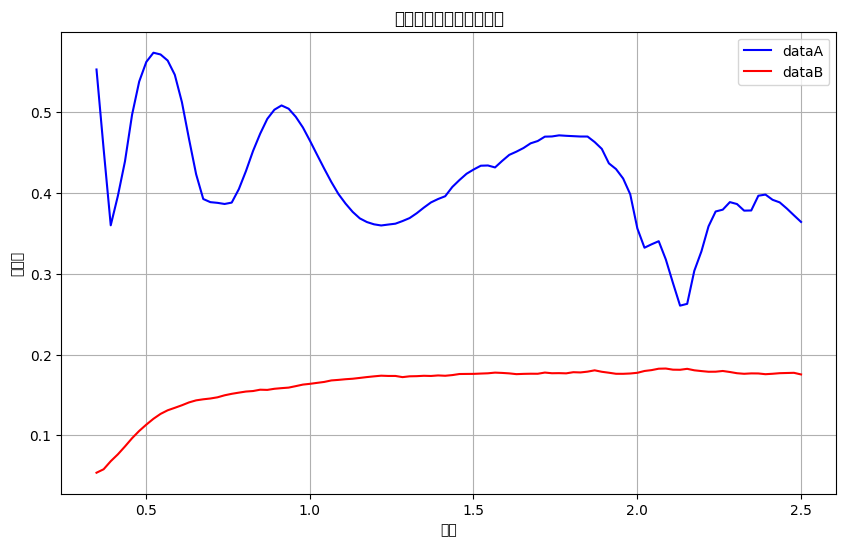

In [56]:
import numpy as np
from scipy.interpolate import CubicSpline

# dataAとdataBの波長データと反射率データを用意
dataA = np.array(dataA)
dataB = np.array(dataB)

# dataAとdataBの波長範囲を求める
min_wavelength = max(min(dataA[:, 0]), min(dataB[:, 0]))
max_wavelength = min(max(dataA[:, 0]), max(dataB[:, 0]))

# 共通の範囲で波長を生成
common_wavelength = np.linspace(min_wavelength, max_wavelength, num=100)

# 三次スプライン補間を行う
csA = CubicSpline(dataA[:, 0], dataA[:, 1])
csB = CubicSpline(dataB[:, 0], dataB[:, 1])

# 補間曲線で共通の波長での反射率を取得
interpolated_A = csA(common_wavelength)
interpolated_B = csB(common_wavelength)

# プロット
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.plot(common_wavelength, interpolated_A, label='dataA', color='blue')
plt.plot(common_wavelength, interpolated_B, label='dataB', color='red')

# 軸ラベルと凡例を設定
plt.xlabel('波長')
plt.ylabel('反射率')
plt.legend()

# グラフを表示
plt.grid(True)  # グリッドを表示
plt.title('スペクトルデータの比較')  # グラフのタイトル
plt.show()

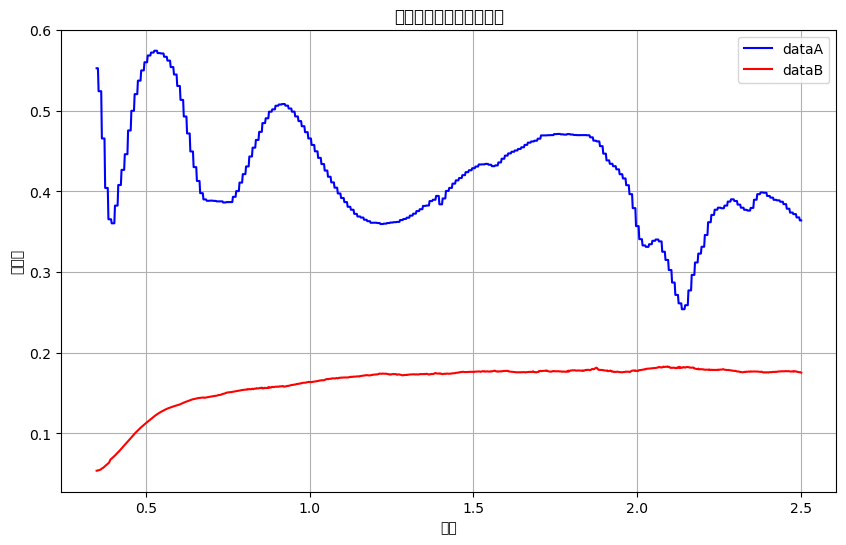

In [42]:
import numpy as np

# dataAとdataBの波長データと反射率データを用意
dataA = np.array(dataA)
dataB = np.array(dataB)

# dataAとdataBの波長範囲を求める
min_wavelength = max(min(dataA[:, 0]), min(dataB[:, 0]))
max_wavelength = min(max(dataA[:, 0]), max(dataB[:, 0]))

# 共通の波長範囲での波長間隔を計算
wavelength_step = min(np.diff(dataA[:, 0]).min(), np.diff(dataB[:, 0]).min())

# 共通の波長範囲での波長データを作成
common_wavelength = np.arange(min_wavelength, max_wavelength, wavelength_step)

# # 共通の波長範囲と間隔を決定
# common_wavelength = np.arange(min_wavelength, max_wavelength + 1, 1)

# dataAを最近傍補間して共通の波長での反射率を求める
interpolated_A = []
for wavelength in common_wavelength:
    nearest_index = np.argmin(np.abs(dataA[:, 0] - wavelength))
    interpolated_A.append(dataA[nearest_index, 1])

# dataBを最近傍補間して共通の波長での反射率を求める
interpolated_B = []
for wavelength in common_wavelength:
    nearest_index = np.argmin(np.abs(dataB[:, 0] - wavelength))
    interpolated_B.append(dataB[nearest_index, 1])

# # 最近傍補間されたデータを比較できます
# print("共通の波長:", common_wavelength)
# print("dataAの反射率:", interpolated_A)
# print("dataBの反射率:", interpolated_B)

# プロット
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.plot(common_wavelength, interpolated_A, label='dataA', color='blue')
plt.plot(common_wavelength, interpolated_B, label='dataB', color='red')

# 軸ラベルと凡例を設定
plt.xlabel('波長')
plt.ylabel('反射率')
plt.legend()

# グラフを表示
plt.grid(True)  # グリッドを表示
plt.title('スペクトルデータの比較')  # グラフのタイトル
plt.show()

In [51]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_file = open('RelabDatabase2022Dec31/Library_Mineral_BD-VNIR.csv', 'r')
# CSVファイルを読み込むためのリーダーを作成
csv_reader = csv.reader(csv_file)

spectrumID_list = np.empty(0)
sampleID_list = np.empty(0)
data_all = []

# CSVファイルを1行ずつ読み込み、行を取得
for row_index, row_data in enumerate(csv_reader):
    spectrumID_list = np.append(spectrumID_list, row_data[0])
    sampleID_list = np.append(sampleID_list, row_data[1])
    band = int(float(row_data[2]))
    wavelength = [float(x) for x in row_data[3:band+3]]
    reflectance = [float(x) for x in row_data[band+3:band*2+3]]
    data = [[x, y] for x, y in zip(wavelength, reflectance)]
    data_all.append(data)

spectrumID_nda = np.insert(spectrumID_list, 0, 'target')
sampleID_nda = np.insert(sampleID_list, 0, 'target')
csv_file.close()


target_df = pd.read_csv('frt00003621_07_if166l_E_-97.71906 N_24.78909.csv')
target_nda = target_df.to_numpy()

for i in range(len(data_all)):
    data_nda = np.array(data_all[i])
    # 共通の波長範囲を見つける
    min_wavelength = max(data_nda[0, 0], target_nda[0, 0])
    max_wavelength = min(data_nda[-1, 0], target_nda[-1, 0])
    # 共通の波長範囲での波長間隔を計算
    wavelength_step = min(np.diff(data_nda[:, 0]).min(), np.diff(target_nda[:, 0]).min())
    # 共通の波長範囲での波長データを作成
    common_wavelength = np.arange(min_wavelength, max_wavelength, wavelength_step)
    # 線形補間でdataとtargetを共通の波長範囲に合わせる_nda_nda
    interpolated_data = np.interp(common_wavelength, data_nda[:, 0], data_nda[:, 1])
    interpolated_target = np.interp(common_wavelength, target_nda[:, 0], target_nda[:, 1])
    
    df = pd.DataFrame(interpolated_target)
    df[1] = interpolated_data
    # ピアソンの相関係数
    df = df.corr()
    
    if i == 0:
        df_all = df.copy()
    else:
        df_all = pd.concat([df_all, df.iloc[1:2]], axis=0)

df_all.insert(0, 'sampleID', sampleID_nda)
df_all.insert(1, 'spectrumID', spectrumID_nda)
index = range(len(data_all)+1)
df_all = df_all.set_axis(index, axis=0)
df_all = df_all.iloc[:,0:3]
df_all = df_all.rename(columns={0: 'result'})
print(df_all)

     sampleID  spectrumID    result
0      target      target  1.000000
1      c1aa01  aa-a1s-001  0.402599
2      c1aa02  aa-a1s-002  0.643000
3      c1aa03  aa-a1s-003  0.455196
4      c1aa04  aa-a1s-004  0.059080
...       ...         ...       ...
6355   c1ze31  ze-eac-031 -0.276977
6356   c1ze32  ze-eac-032 -0.294268
6357   c1ze57  ze-eac-057 -0.365441
6358   cazi01  zi-eac-001  0.158309
6359   cazi02  zi-eac-002  0.461485

[6360 rows x 3 columns]
